In [62]:
%pip install sklearn
%pip install bs4
%pip install requests
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from bs4 import BeautifulSoup
import requests

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
# df = pd.read_csv("DeathGripsDataset.csv", usecols=["danceability", "energy", "key",
#        "loudness", "speechiness", "acousticness", "instrumentalness",
#        "valence", "tempo", "Labels"])
df = pd.read_csv("DeathGripsDataset.csv", usecols=['names', 'albums', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'types', 'duration_ms', 'time_signature', 'Labels'])
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             88 non-null     object 
 1   albums            88 non-null     object 
 2   danceability      88 non-null     float64
 3   energy            88 non-null     float64
 4   key               88 non-null     int64  
 5   loudness          88 non-null     float64
 6   mode              88 non-null     int64  
 7   speechiness       88 non-null     float64
 8   acousticness      88 non-null     float64
 9   instrumentalness  88 non-null     float64
 10  valence           88 non-null     float64
 11  tempo             88 non-null     float64
 12  types             88 non-null     object 
 13  duration_ms       88 non-null     int64  
 14  time_signature    88 non-null     int64  
 15  Labels            88 non-null     int64  
dtypes: float64(8), int64(5), object(3)
memory usag

names               0
albums              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
types               0
duration_ms         0
time_signature      0
Labels              0
dtype: int64

In [64]:
#function to scrape lyrics from genius
def scrape_lyrics(artistname, songname):
    # print(artistname, songname)
    artistname2 = str(artistname.replace(' ','-')) if ' ' in artistname else str(artistname)
    songname2 = str(songname.replace(' ','-')) if ' ' in songname else str(songname)
    page = requests.get('https://genius.com/'+ artistname2 + '-' + songname2 + '-' + 'lyrics')
    html = BeautifulSoup(page.text, 'html.parser')
    lyrics1 = html.find("div", class_="lyrics")
    lyrics2 = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-2 jgQsqn")
    if lyrics1:
        lyrics = lyrics1.get_text()
    elif lyrics2:
        lyrics = lyrics2.get_text()
    elif lyrics1 == lyrics2 == None:
        lyrics = None
    print(lyrics2, lyrics1)
    return lyrics

#function to attach lyrics onto data frame
#artist_name should be inserted as a string
def lyrics_onto_frame(df1, artist_name):
    for i,x in enumerate(df1['track']):
        test = scrape_lyrics(artist_name, x)
        df1.loc[i, 'lyrics'] = test
    return df1

In [65]:
# lyrics_onto_frame(df, "Death Grips")
h = []
for i,x in enumerate(df['names']):
    h.append(scrape_lyrics("Death Grips", df.loc[i, 'names']))

None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None
None None


KeyboardInterrupt: 

In [ ]:
df['lyrics'] = h
print(df.loc[1])
df.to_csv("DeathGripsDatasetLyrics.csv")

names               The Fever (Aye Aye)
albums                  The Money Store
danceability                      0.432
energy                             0.94
key                                  10
loudness                         -4.099
mode                                  0
speechiness                       0.374
acousticness                      0.159
instrumentalness                    0.0
valence                           0.225
tempo                            80.084
types                    audio_features
duration_ms                      186973
time_signature                        4
Labels                                0
lyrics                             None
Name: 1, dtype: object


In [ ]:
# sns.pairplot(df, hue="Labels")

In [ ]:
X = df[["danceability", "energy", "key",
       "loudness", "speechiness", "acousticness", "instrumentalness",
       "valence", "tempo"]]
Y = df.Labels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # 70% training and 30% test

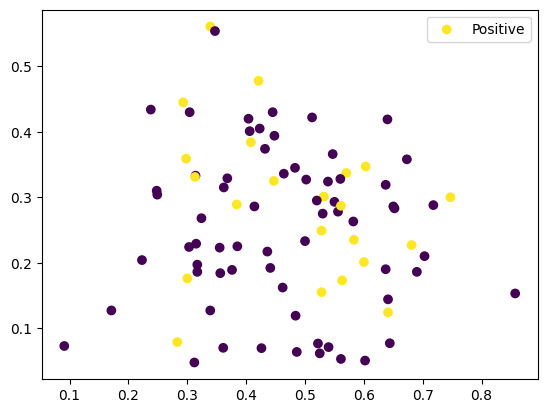

In [ ]:
# sns.(df['danceability'], df['speechiness'], hue=df.Labels)
# sns.scatterplot(df['danceability'], df['speechiness'])
plt.scatter(df['danceability'],df['speechiness'], c=df["Labels"], label = 'Positive')
plt.legend()

<Axes: xlabel='speechiness', ylabel='Count'>

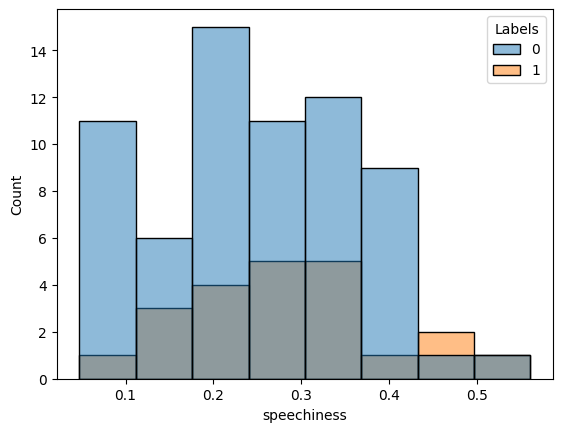

In [ ]:
sns.histplot(data=df, x="speechiness", hue="Labels")

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# model = model_pipeline[3]
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# acc_list.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
# auc_list.append(round(metrics.auc(fpr, tpr),2))
# cm_list.append(confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.auc(fpr, tpr))
print(confusion_matrix(y_test, y_pred))

0.5555555555555556
0.6111111111111112
[[ 8 10]
 [ 2  7]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.auc(fpr, tpr))
print(confusion_matrix(y_test, y_pred))

0.6666666666666666
0.5277777777777778
[[17  1]
 [ 8  1]]


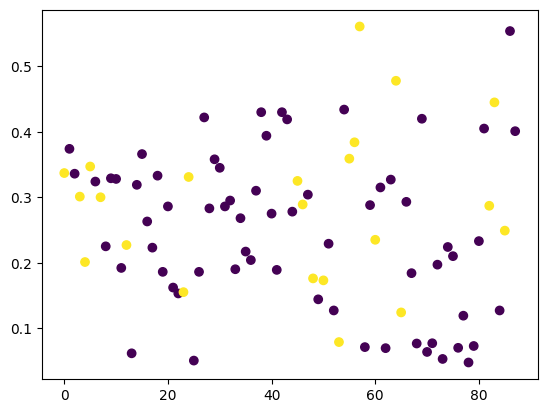

In [ ]:
plt.scatter(df.index,df['speechiness'],c=df["Labels"], label = 'Positive')

ValueError: x and y must be the same size

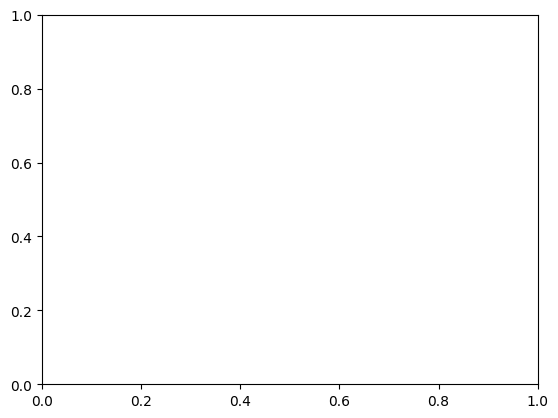

In [ ]:
from sklearn import datasets
from sklearn import svm

# X = df[['danceability','speechiness']]

# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

# linear data
# X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
# y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])
# X = np.array(dataset['ID'])
# y = np.array(dataset['Temps'])

# show unclassified data
plt.scatter(X, Y)
plt.show()

# shaping data for training the model
# training_X = np.vstack((X, y)).T
# training_y = [1 if dataset['ID'][i] < 200  and dataset['Temps'][i] > 1500 else 0 for i in range(len(dataset['ID']))]

# define the model
clf = svm.SVC(kernel='linear', C=1.0)

# train the model
clf.fit(X_train, y_train)

nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

# training non-linear model
nonlinear_clf.fit(X_train, y_train)

# plot data and decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.legend()
plt.show()

In [ ]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, Y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[13  4]
 [10  3]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        17
           1       0.43      0.23      0.30        13

    accuracy                           0.53        30
   macro avg       0.50      0.50      0.47        30
weighted avg       0.51      0.53      0.50        30



=== All AUC Scores ===
[0.375      0.79166667 0.5        0.875      0.875      0.71428571
 0.42857143 0.47619048 0.5952381  0.44444444]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6075396825396826
